<a href="https://colab.research.google.com/github/yashowardhansinghtomar/Statistics/blob/main/Statistics_Savings_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

savings_data = "https://raw.githubusercontent.com/whitehatjr/datasets/master/savings_data.csv"

df = pd.read_csv(savings_data)
df.head()

,quant_saved,female,highschool_completed,wealthy
0,13.0908,1,0,0
1,39.2724,0,1,1
2,294.5430,0,1,1
3,58.9086,1,1,1
4,78.5448,1,1,1


Above is a Savings data.
<br/>Will analyze who have more savings, men or women!

In [ ]:
df.shape

(13560, 4)

In [ ]:
import plotly.express as px

fig = px.scatter(df, y='quant_saved', color='female')
fig.show()

In [ ]:
df['female'].value_counts()

1    8631
0    4929
Name: female, dtype: int64

<Axes: >

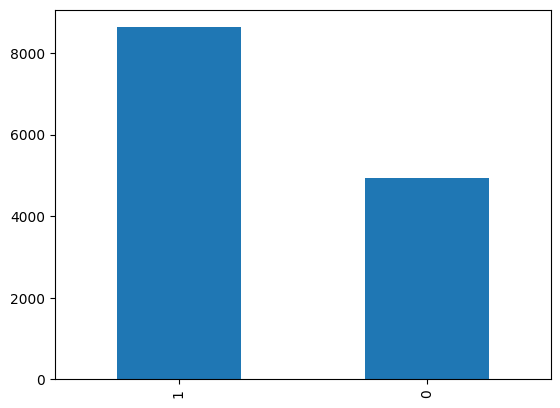

In [ ]:
df['female'].value_counts().plot.bar()

In [ ]:
df['quant_saved'].describe()

count    13560.000000
mean        85.327803
std        196.754530
min          0.000000
25%          2.284000
50%         39.272400
75%         86.514000
max       7353.690000
Name: quant_saved, dtype: float64

In [ ]:
savings = df['quant_saved']
mean = savings.mean()
median = savings.median()
mode = savings.mode()[0]

print("Mean of Savings data = {} \nMedian of Savings data = {} \nMode of Savings data = {} ".format(mean,median,mode))

Mean of Savings data = 85.32780331328738 
Median of Savings data = 39.2724 
Mode of Savings data = 0.0 


In [ ]:
savings_female = df[ df['female']==1 ].quant_saved
savings_male = df[ df['female']==0 ].quant_saved

mean_female = savings_female.mean()
median_female = savings_female.median()
mode_female = savings_female.mode()[0]
print(f"Mean of Female Savings data = {mean_female} \nMedian of Female Savings data = {median_female} \nMode of Female Savings data = {mode_female} \n")

mean_male = savings_male.mean()
median_male = savings_male.median()
mode_male = savings_male.mode()[0]
print(f"Mean of Male Savings data = {mean_male} \nMedian of Male Savings data = {median_male} \nMode of Male Savings data = {mode_male}")

Mean of Female Savings data = 80.09986788931771 
Median of Female Savings data = 39.2724 
Mode of Female Savings data = 0.0 

Mean of Male Savings data = 94.48225870875957 
Median of Male Savings data = 39.2724 
Mode of Male Savings data = 0.0


In [ ]:
sd_savings = savings.std()
sd_female = savings_female.std()
sd_male = savings_male.std()

print(f"Standard deviation of : \n\tSavings data = {sd_savings} \n\tFemale Savings data = {sd_female} \n\tMale Savings data = {sd_male}")

Standard deviation of : 
	Savings data = 196.75453011909315 
	Female Savings data = 183.70373742366775 
	Male Savings data = 217.44838443764846


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([savings], ['Savings data'], show_hist=False)
fig.show()

<Axes: xlabel='quant_saved'>

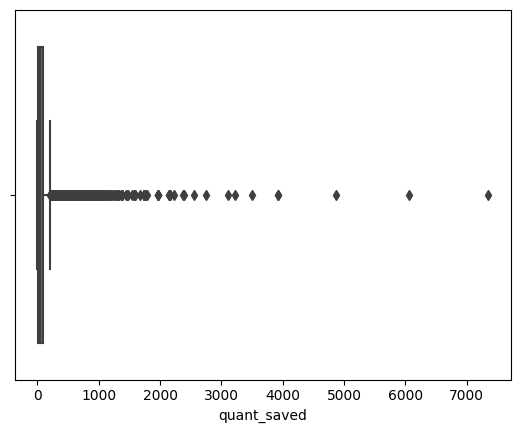

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x='quant_saved')

Outliners can be clearly visualized through Box plot.

Outliners can be found with IQR (Interquartile Range) and then to be removed. <br/>
### IQR = Q3 - Q1

![](https://www.simplypsychology.org/wp-content/uploads/boxplot-outliers.png)

In [ ]:
Q1 = df['quant_saved'].quantile(0.25)
Q3 = df['quant_saved'].quantile(0.75)

IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_whisker}")
print(f"Upper Whisker = {upper_whisker}")

Q1 = 2.284
Q3 = 86.514
IQR = 84.22999999999999
Lower Whisker = -124.06099999999998
Upper Whisker = 212.85899999999998


In [ ]:
#new_df = df[ (df['quant_saved']>lower_whisker) & (df['quant_saved']<upper_whisker) ]
new_df = df[ df['quant_saved']<upper_whisker ]
new_df.head()

,quant_saved,female,highschool_completed,wealthy
0,13.0908,1,0,0
1,39.2724,0,1,1
3,58.9086,1,1,1
4,78.5448,1,1,1
5,39.2724,1,1,1


In [ ]:
new_df.shape

(12378, 4)

In [ ]:
def population_data(new_df, name=""):
    savings_new = new_df.quant_saved
    mean = savings_new.mean()
    median = savings_new.median()
    mode = savings_new.mode()[0]
    sd = savings_new.std()
    print(f"Mean of Savings data = {mean} \nMedian of Savings data = {median} \nMode of Savings data = {mode} \nStandard deviation of Savings data = {sd} \n")

    fig = ff.create_distplot([savings_new], [name + 'Savings data'], show_hist=False)
    fig.show()

    return savings_new.to_list()

savings_new = population_data(new_df)

Mean of Savings data = 46.20051938981879 
Median of Savings data = 36.0475 
Mode of Savings data = 0.0 
Standard deviation of Savings data = 50.866871917288634 



Sampling mean distribution to get a Normal distribution bell curve

In [ ]:
import random
import statistics as st
import plotly.graph_objects as go

def sampling_data(savings_new, name=""):
    mean_list = []
    for i in range(1000):
        sample_list = []
        for j in range(100):
            sample_list.append(random.choice(savings_new))
        mean_list.append(st.mean(sample_list))

    mean_sampling = st.mean(mean_list)
    fig = ff.create_distplot([mean_list], [name + 'Savings data (sampling)'], show_hist=False)
    fig.add_trace(go.Scatter(x=[mean_sampling,mean_sampling], y=[0,0.074], name='Sampling Mean'))
    fig.show()

    return mean_list

mean_list = sampling_data(savings_new)

In [ ]:
def display(mean_list, savings_new):
    print(f"Standard deviation of sampling data = {st.stdev(mean_list)}")
    print(f"Mean of population = {st.mean(savings_new)}")
    print(f"Mean of Sampling distribution = {st.mean(mean_list)}")

display(mean_list, savings_new)

Standard deviation of sampling data = 5.1262795133078685
Mean of population = 46.20051938981879
Mean of Sampling distribution = 46.31333532865163


### Now, let's find out women or men, who have more savings!

In [ ]:
print("\t\t WOMEN SAVINGS DATA")
df_female = new_df[new_df['female']==1]
df_female.head()

		 WOMEN SAVINGS DATA


,quant_saved,female,highschool_completed,wealthy
0,13.0908,1,0,0
3,58.9086,1,1,1
4,78.5448,1,1,1
5,39.2724,1,1,1
6,32.7270,1,1,1


In [ ]:
print("\t\t WOMEN SAVINGS")
savings_female = population_data(df_female, 'Female ')

		 WOMEN SAVINGS
Mean of Savings data = 45.60026753686608 
Median of Savings data = 36.0475 
Mode of Savings data = 0.0 
Standard deviation of Savings data = 49.74602040968225 



In [ ]:
mean_list_female = sampling_data(savings_female, 'Female ')

In [ ]:
print("\t\t WOMEN SAVINGS")
display(mean_list_female, savings_female)

		 WOMEN SAVINGS
Standard deviation of sampling data = 4.975763810229737
Mean of population = 45.60026753686608
Mean of Sampling distribution = 45.62945780921086


Men savings data

In [ ]:
print("\t\t MEN SAVINGS DATA")
df_male = new_df[new_df['female']==0]
df_male.head()

		 MEN SAVINGS DATA


,quant_saved,female,highschool_completed,wealthy
1,39.272400,0,1,1
8,2.284000,0,1,1
10,58.908600,0,1,1
17,2.284000,0,1,1
28,47.178078,0,0,0


In [ ]:
print("\t\t MEN SAVINGS")
savings_male = population_data(df_male, 'Male ')

		 MEN SAVINGS
Mean of Savings data = 47.27631478158719 
Median of Savings data = 32.727 
Mode of Savings data = 0.0 
Standard deviation of Savings data = 52.80486556118663 



In [ ]:
mean_list_male = sampling_data(savings_male, 'Male ')

In [ ]:
print("\t\t MEN SAVINGS")
display(mean_list_male, savings_male)

		 MEN SAVINGS
Standard deviation of sampling data = 5.159594454843123
Mean of population = 47.27631478158719
Mean of Sampling distribution = 47.01201923903612


## Z-Score

In [ ]:
mean_female = st.mean(mean_list_female)
mean_male = st.mean(mean_list_male)
sd_male = st.stdev(mean_list_male)

z_score = (mean_female-mean_male)/sd_male
print(f"Z-score = ", z_score)

Z-score =  -0.2679593215950333


### From the z-score, it is clear that there's not much significant difference between number of women and number of men who have savings.